#### Видеокурс по теории вероятностей и математической статистике (20 ноября - 30 декабря)
Домашнее задание

*Урок 3

__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек `numpy`, `pandas` и др.), посчитайте (несмещённое) среднее квадратичное отклонение для данной выборки.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
df=pd.DataFrame([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])
df.head(3)

,0
0,100
1,80
2,75


In [10]:
#Среднее квадратическое отклонение 
np.sqrt(((df[0] - df[0].mean()) ** 2).sum() / (df[0].shape[0] - 1))

47.347952135531386

In [11]:
# проверка расчета средствами python
df[0].std(ddof=1)

47.34795213553139

__Задача 2__

Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении "усов" в `boxplot`, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.


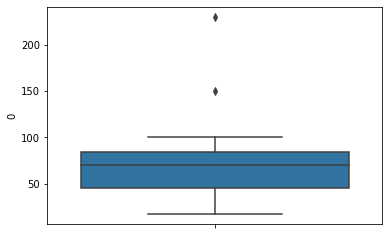

In [14]:
sns.boxplot(data=df, y=0)

In [38]:
q1, q3 = df[0].quantile([0.25, 0.75])

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-13.5, 142.5)

In [47]:
#выбросы
rslt_df = df.loc[df[0] > boxplot_range[1]]
rslt_df

,0
11,230
20,150


найдено 2 выброса: 230 и 150

__Задача 3__

В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:
1. студент учится на факультете A,
2. студент учится на факультете B,
3. студент учится на факультете C?

_Замечание_: да, эта задача не на тему статистики, но тема важная, и её стоит иногда освежать в памяти.


Решение
считаем вероятности по формуле Байеса
P(A|S), P(B|S), P(C|S)
P(A|S)=P(A)*P(A|S)/P(S) и тп
P(A)=100/235, P(B)=90/235, P(C)=45/235
заданы P(S|A)=0.6, P(S|B)=0.7, P(S|C)=0.8
P(S)=P(S|A)*P(A)+P(S|B)*P(B)+P(S|C)*P(C)
СЧИТАЕМ ВСЕ ВМЕСТЕ:

In [36]:
dp=pd.DataFrame({"faculty": ["A","B","C"],
                "kolvo": [100,90,45],
               "p_sa_sb_sc": [0.6,0.7,0.8]})
dp['p_kolvo']=dp['kolvo']/235
dp['p_psa_psb_psc']=dp['p_sa_sb_sc']*dp['p_kolvo']
p_s=dp['p_psa_psb_psc'].sum()
print(f'P(S)={p_s}')
dp

P(S)=0.676595744680851


,faculty,kolvo,p_sa_sb_sc,p_kolvo,p_psa_psb_psc
0,A,100,0.6,0.425532,0.255319
1,B,90,0.7,0.382979,0.268085
2,C,45,0.8,0.191489,0.153191


In [37]:
dp['p_as_bs_cs']=dp['p_sa_sb_sc']*dp['p_kolvo']/p_s
dp

,faculty,kolvo,p_sa_sb_sc,p_kolvo,p_psa_psb_psc,p_as_bs_cs
0,A,100,0.6,0.425532,0.255319,0.377358
1,B,90,0.7,0.382979,0.268085,0.396226
2,C,45,0.8,0.191489,0.153191,0.226415


##### ответ: 
вариант 2 - студент учится на факультете B, тк вероятность в этом случае самая большая.